# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [27]:
# Create the data parameters
weight = 0.3
bias = 0.9


# Make X and y using linear regression feature
X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [28]:
# Split the data into training and testing
split_size = 0.8
X_train,y_train = X[:int(split_size*len(X))],y[:int(split_size*len(X))]
X_test,y_test = X[int(split_size*len(X)):],y[int(split_size*len(X)):]

len(X_train)

80

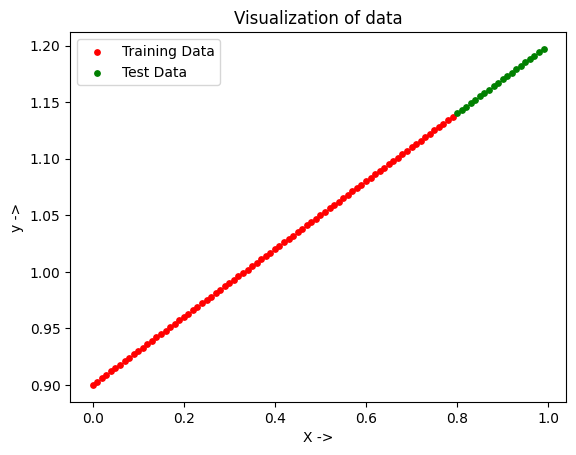

In [29]:
# Plot the training and testing data
plt.scatter(X_train,y_train,c='r',s=15,label= "Training Data")
plt.scatter(X_test,y_test,c='g',s=15,label= "Test Data")

plt.xlabel("X ->")
plt.ylabel("y ->")
plt.title("Visualization of data")
plt.legend()
plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [30]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self,X: torch.Tensor)->torch.Tensor:
    return self.linear_layer(X)


In [31]:
# Instantiate the model and put it to the target device
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.1404]])),
             ('linear_layer.bias', tensor([-0.4888]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [32]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

model_0.parameters()

<generator object Module.parameters at 0x787a5a0bb760>

In [33]:
# Training loop
epochs = 300
epoch_count = []
test_losses = []
train_losses = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  train_loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  if epoch %20==0:
    model_0.eval()
    with torch.inference_mode():
      y_pred_test = model_0(X_test)
      test_loss = loss_fn(y_pred_test,y_test)
    epoch_count.append(epoch)
    test_losses.append(test_loss.item())
    train_losses.append(train_loss.item())
    print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")



Epoch: 0 | Train loss: 1.563 | Test loss: 1.769
Epoch: 20 | Train loss: 1.332 | Test loss: 1.499
Epoch: 40 | Train loss: 1.100 | Test loss: 1.228
Epoch: 60 | Train loss: 0.869 | Test loss: 0.957
Epoch: 80 | Train loss: 0.638 | Test loss: 0.687
Epoch: 100 | Train loss: 0.407 | Test loss: 0.416
Epoch: 120 | Train loss: 0.176 | Test loss: 0.145
Epoch: 140 | Train loss: 0.017 | Test loss: 0.037
Epoch: 160 | Train loss: 0.010 | Test loss: 0.022
Epoch: 180 | Train loss: 0.003 | Test loss: 0.006
Epoch: 200 | Train loss: 0.008 | Test loss: 0.007
Epoch: 220 | Train loss: 0.008 | Test loss: 0.007
Epoch: 240 | Train loss: 0.008 | Test loss: 0.007
Epoch: 260 | Train loss: 0.008 | Test loss: 0.007
Epoch: 280 | Train loss: 0.008 | Test loss: 0.007


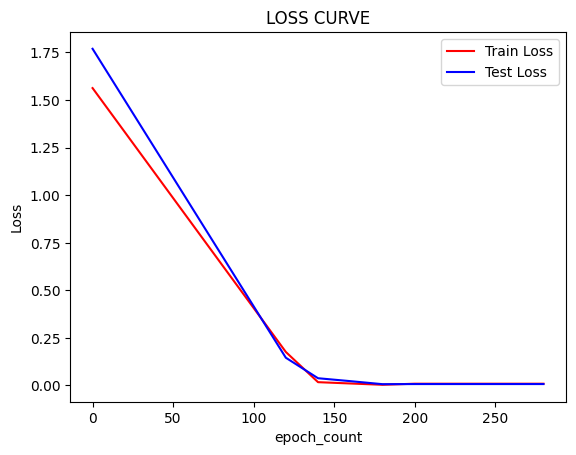

In [51]:
plt.plot(epoch_count,train_losses, c="r",label = "Train Loss")
plt.plot(epoch_count,test_losses, c="b",label = "Test Loss")
plt.xlabel("epoch_count")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend()
plt.show()

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [39]:
# Make predictions with the model

model_0.eval()
with torch.inference_mode():
  predictions = model_0(X_test)

predictions.squeeze(dim=1)

tensor([1.1328, 1.1359, 1.1389, 1.1419, 1.1450, 1.1480, 1.1510, 1.1541, 1.1571,
        1.1601, 1.1632, 1.1662, 1.1692, 1.1723, 1.1753, 1.1783, 1.1814, 1.1844,
        1.1874, 1.1905])

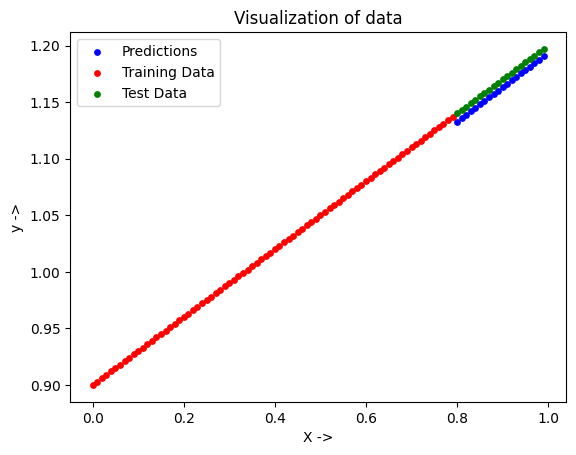

In [40]:
# Plot the predictions (these may need to be on a specific device)

plt.scatter(X_test,predictions,c= 'b',s = 15,label="Predictions")
plt.scatter(X_train,y_train,c='r',s=15,label= "Training Data")
plt.scatter(X_test,y_test,c='g',s=15,label= "Test Data")

plt.xlabel("X ->")
plt.ylabel("y ->")
plt.title("Visualization of data")
plt.legend()
plt.show()

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [43]:
from pathlib import Path

# 1. Create models directory

model_dir = Path("models")
model_dir.mkdir(parents= True,
                exist_ok = True)

# 2. Create model save path
model_file_name = "linear_regression.pth"
model_save_path = model_dir/model_file_name

# 3. Save the model state dict
torch.save(obj = model_0.state_dict(),
           f = model_save_path)

In [44]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(model_save_path))



<All keys matched successfully>

In [46]:
# Make predictions with loaded model and compare them to the previous
model_1.eval()
with torch.inference_mode():
  pred = model_1(X_test)

assignment = (pred == predictions).squeeze(dim=1)
assignment

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])